# Homework 8 - Plotting
# By: Yukun Wan (yw3447)

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import requests
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
df_xls = pd.read_excel(r'http://www.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_data_reported_in_2016.xlsx')
df_xls.to_csv(r'data/nyc_benchmarking_disclosure_data_reported_in_2016.csv',encoding='utf-8')

#2016 Energy and Water Data Disclosure (Data for Calendar Year 2015)
df = pd.read_csv('data/nyc_benchmarking_disclosure_data_reported_in_2016.csv')

df.head()

,Unnamed: 0,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


In [3]:
del df['Unnamed: 0']
cols = df.columns.str.replace('\xc2\xb2','_2')
df.columns = cols
df = df[df['Primary Property Type - Self Selected'] == 'Multifamily Housing']

df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft_2),Property GFA - Self-reported (ft_2),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft_2),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
8,2792771.0,9,1.000088e+09,NaN,NaN,1087700,"Whitehall Properties, LLC",Not Applicable: Standalone Property,Not Applicable: Standalone Property,39.0,...,1116.3,625.9,169061.0,169055.0,NaN,NaN,2016-03-23 12:34:18,NaN,NaN,NaN


In [4]:
df.columns

Index([u'Record Number', u'Order', u'NYC Borough, Block and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identification Numbers (BINs)',
       u'Property Name', u'Parent Property Id', u'Parent Property Name',
       u'Street Number', u'Street Name', u'Zip Code', u'Borough',
       u'DOF Benchmarking Submission Status',
       u'Primary Property Type - Self Selected',
       u'List of All Property Use Types at Property',
       u'Largest Property Use Type',
       u'Largest Property Use Type - Gross Floor Area (ft_2)',
       u'2nd Largest Property Use Type',
       u'2nd Largest Property Use - Gross Floor Area (ft_2)',
       u'3rd Largest Property Use Type',
       u'3rd Largest Property Use Type - Gross Floor Area (ft_2)',
       u'Year Built', u'Number of Buildings - Self-reported', u'Occupancy',
       u'Metered Areas (Energy)', u'Metered Areas  (Water)',
       u'ENERGY STAR Score', u'Site EUI (kBtu/ft_2)',
       u'Weather Nor

In [5]:
df['Site EUI (kBtu/ft_2)'].describe()

count      8654.000000
mean        405.938456
std        9520.852245
min           0.000000
25%          67.900000
50%          82.900000
75%         101.100000
max      801504.700000
Name: Site EUI (kBtu/ft_2), dtype: float64

In [6]:
df = df.dropna(subset=['Site EUI (kBtu/ft_2)'])
print('Example after droping NaNs',len(df))
df = df[df['Site EUI (kBtu/ft_2)']>0]
print('after droping zeros',len(df))

('Example after droping NaNs', 8654)
('after droping zeros', 8652)


In [7]:
df1 = pd.DataFrame(df.groupby(df['Zip Code'],as_index=False)['Site EUI (kBtu/ft_2)'].mean())
df1.columns = ['ZipCode','SiteEUI']
df1.head()

,ZipCode,SiteEUI
0,10001.0,76.760317
1,10002.0,94.607692
2,10003.0,371.870796
3,10004.0,99.012500
4,10005.0,1519.475000


In [8]:
df1.SiteEUI.describe()

count      170.000000
mean       713.984754
std       3813.950764
min         22.900000
25%         78.171740
50%         87.897009
75%        100.539372
max      40263.400000
Name: SiteEUI, dtype: float64

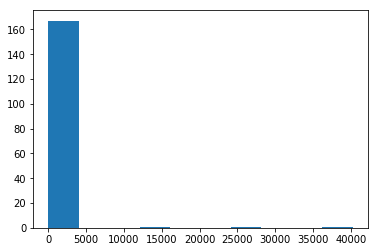

In [9]:
plt.hist(df1.SiteEUI)
plt.show()

In [10]:
#df1 = df1[(df1['SiteEUI'] > df1['SiteEUI'].mean() - 2 * df1['SiteEUI'].std())
#  & (df1['SiteEUI'] < df1['SiteEUI'].mean() + 2 * df1['SiteEUI'].std())]

df1 = df1[df1['SiteEUI'] < 1000]

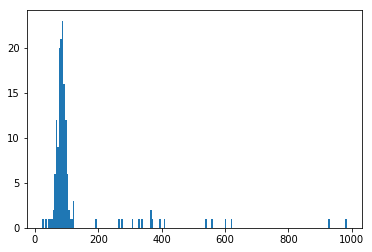

In [11]:
plt.hist(df1.SiteEUI,bins=200)
plt.show()

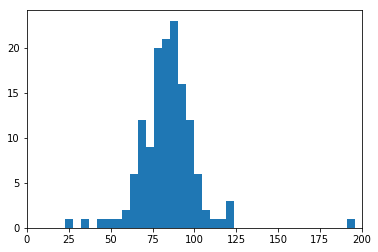

In [12]:
plt.hist(df1.SiteEUI,bins=200)
plt.xlim(0,200)
plt.show()

In [13]:
df1.describe()

,ZipCode,SiteEUI
count,156.000000,156.000000
mean,10801.025641,124.532589
std,569.887266,138.775438
min,10001.000000,22.900000
25%,10296.250000,77.054210
50%,11105.500000,86.250000
75%,11356.250000,95.798077
max,11694.000000,983.802830


In [14]:
df1.head()

,ZipCode,SiteEUI
0,10001.0,76.760317
1,10002.0,94.607692
2,10003.0,371.870796
3,10004.0,99.012500
5,10006.0,81.820000


In [15]:
df1['label'] = 0

In [16]:
a,b,c = df1['SiteEUI'].quantile([.25,.50,.75]).values

In [17]:
df1.loc[df1['SiteEUI']< a,'label'] = 0
df1.loc[(df1['SiteEUI'] >= a) & (df1['SiteEUI'] < b),'label'] = 1
df1.loc[(df1['SiteEUI'] >= b) & (df1['SiteEUI'] < c),'label'] = 2
df1.loc[df1['SiteEUI'] >= c,'label'] = 3

In [18]:
res = pd.DataFrame([df1['label'],df1['ZipCode']]).T
res.reset_index(inplace=True)
res.drop(['index'],axis=1,inplace=True)

In [19]:
res.ZipCode = res.ZipCode.astype(int)
res.label = res.label.astype(int)

In [20]:
res.head()

,label,ZipCode
0,0,10001
1,2,10002
2,3,10003
3,3,10004
4,1,10006


In [21]:
res.label.unique()

array([0, 2, 3, 1])

In [22]:
zipsf = shp.Reader('data/NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

In [30]:
#plot clustering over the map of NYC zip codes
def plot_on_map(result,leg):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'ZipCode']
        x[key]=result.loc[i,'label']
    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+2))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))
            
    ax.axis('scaled')
    plt.title("NYC Site EUI (kBtu/ft_2) on Zip Code")

    clum_num=len(result.loc[:,'label'].unique())

    handles = []
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label=leg[t])
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left',title='Site EUI (kBtu/ft_2)')
    plt.show()
    plt.savefig('yw3447_plot.png')

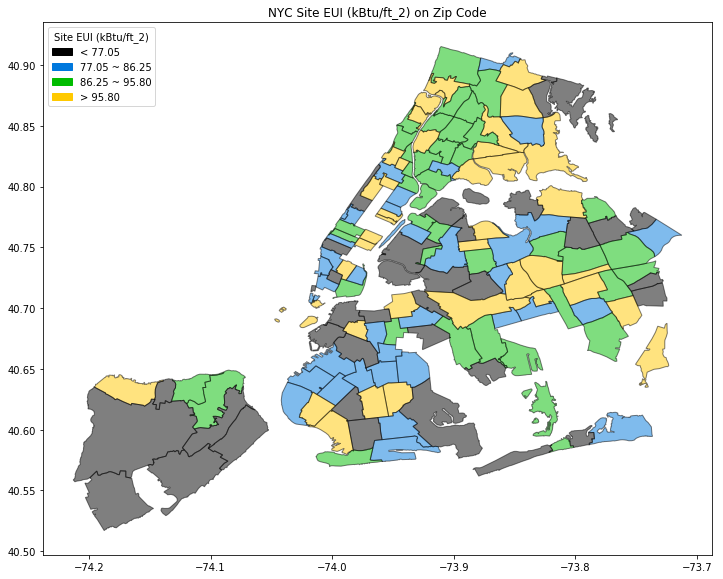

Figure 1: NYC Energy usage (Site EUI (kBtu/ft_2)) for each Zip Codes.
Black shows the areas whose average Site EUI is below 77.05(<25% of the whole). Blue shows the areas whose average Site EUI is between 77.05 and 86.25 (25% ~ 50% of the whole). Blue shows the areas whose average Site EUI is between 86.25 and 95.80 (50% ~ 75% of the whole). Yellow shows the areas whose average Site EUI is over 95.80 (>75% of the whole).


In [29]:
percent = ['< %.2f'%a , '%.2f ~ %.2f'%(a,b) ,'%.2f ~ %.2f'%(b,c) , '> %.2f'%c]
plot_on_map(res,percent)
print("Figure 1: NYC Energy usage (Site EUI (kBtu/ft_2)) for each Zip Codes.\nBlack shows the \
areas whose average Site EUI is below 77.05(<25% of the whole). Blue shows the \
areas whose average Site EUI is between 77.05 and 86.25 (25% ~ 50% of the whole). Blue shows the \
areas whose average Site EUI is between 86.25 and 95.80 (50% ~ 75% of the whole). Yellow shows the \
areas whose average Site EUI is over 95.80 (>75% of the whole).")